<a href="https://colab.research.google.com/github/Mahika-07/Pesu_io_assignments/blob/main/assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing** **the** **Libraries**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**Importing** **the** **dataset**

In [4]:
dataset = pd.read_csv('housing.csv')
x = dataset.iloc[:, [1, 8]].values

In [5]:
print(x)

[[41.     4.526]
 [21.     3.585]
 [52.     3.521]
 ...
 [17.     0.923]
 [18.     0.847]
 [16.     0.894]]


**Feature Scaling**

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_1 = sc.fit_transform(x)

**Applying PCA**

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
x_new = pca.fit_transform(x)

In [8]:
print(x_new)

[[-12.38392163   2.3366217 ]
 [  7.62431381   1.59097068]
 [-23.37358311   1.22425236]
 ...
 [ 11.65011807  -1.03184157]
 [ 10.6509079   -1.11760315]
 [ 12.65035358  -1.05107498]]


**Using the elbow method to find the optimal number of clusters**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

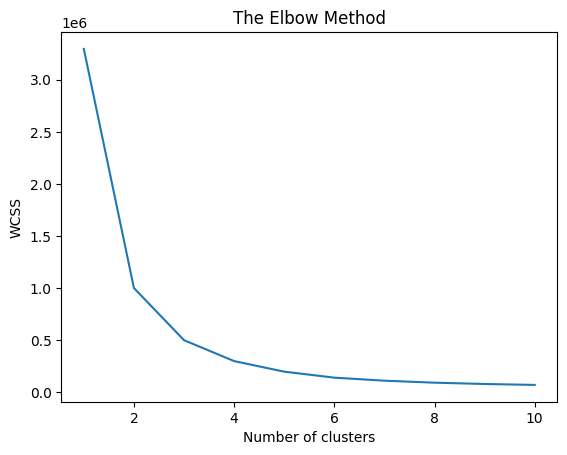

In [9]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x_new)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

**Training the K-means model on the dataset**

In [10]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(x_new)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


**Visualising the clusters**

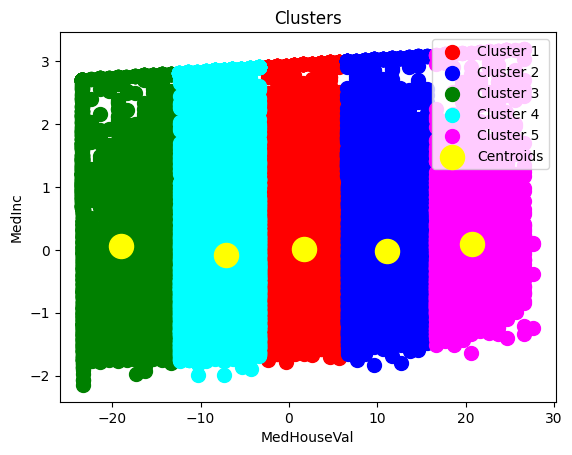

In [12]:
plt.scatter(x_new[y_kmeans == 0, 0], x_new[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x_new[y_kmeans == 1, 0], x_new[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x_new[y_kmeans == 2, 0], x_new[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(x_new[y_kmeans == 3, 0], x_new[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(x_new[y_kmeans == 4, 0], x_new[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('MedHouseVal')
plt.ylabel('MedInc')
plt.legend()
plt.show()